# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline

# First look on data

In [2]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

train = pd.read_csv('adult/adult.data', header=None, names=columns, skipinitialspace=True, na_values='?')
test = pd.read_csv('adult/adult.test', header=None, names=columns, skipinitialspace=True, na_values='?', skiprows=1)

train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
train.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4956,41,Private,374764,Bachelors,13,Widowed,Exec-managerial,Unmarried,White,Male,0,0,20,United-States,<=50K
4414,51,Private,194908,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
18738,58,Self-emp-not-inc,140729,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,35,United-States,<=50K
28871,26,Private,337940,5th-6th,3,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,Mexico,<=50K
14269,34,Self-emp-not-inc,28568,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,>50K


# Existing NaNs in train data frame

In [4]:
print(train.isna().sum().sort_values(ascending=False))
print('---------------------------\nTotal number of NaNs: ', train.isna().sum().sum(), '\n---------------------------')

occupation        1843
workclass         1836
native-country     583
fnlwgt               0
education            0
education-num        0
age                  0
marital-status       0
relationship         0
sex                  0
race                 0
capital-gain         0
capital-loss         0
hours-per-week       0
income               0
dtype: int64
---------------------------
Total number of NaNs:  4262 
---------------------------


# Existing duplicates in train data frame

In [5]:
train.duplicated().sum()

np.int64(24)

In [6]:
train[train.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


### Dropping duplicated rows & NaNs

In [7]:
train = train.drop_duplicates()

In [8]:
train = train.dropna()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital-gain    30139 non-null  int64 
 11  capital-loss    30139 non-null  int64 
 12  hours-per-week  30139 non-null  int64 
 13  native-country  30139 non-null  object
 14  income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
numerical_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
numerical_df = train[numerical_columns]
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30139.0,38.441720,13.131426,17.0,28.0,37.0,47.0,90.0
fnlwgt,30139.0,189795.025980,105658.624341,13769.0,117627.5,178417.0,237604.5,1484705.0
capital-gain,30139.0,1092.841202,7409.110596,0.0,0.0,0.0,0.0,99999.0
capital-loss,30139.0,88.439928,404.445239,0.0,0.0,0.0,0.0,4356.0
hours-per-week,30139.0,40.934703,11.978753,1.0,40.0,40.0,45.0,99.0


In [11]:
categorical_columns = [ 'workclass', 'education', 'education-num', 'marital-status', 
                        'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
index = ['count', 'unique', 'top', 'top-freq', 'least-freq', 'top-freq-%', 'min-occurrence', 'NaN-count']

def summarize_column(column):
    value_counts = train[column].value_counts()
    most_freq_percentage = (value_counts.max() / train[column].count()) * 100

    return [
        train[column].count(),              # Non-null count
        train[column].nunique(),            # Number of unique values
        value_counts.idxmax(),              # Most frequent value (label)
        value_counts.max(),                 # Frequency of the most frequent value
        value_counts.min(),                 # Frequency of the least frequent value
        f"{most_freq_percentage:.2f}%",     # Percentage of the most frequent value
        value_counts.idxmin(),              # Least frequent value (label)
        train[column].isna().sum()          # Null count
    ]

categorical_dict = {col: summarize_column(col) for col in categorical_columns}
categorical_df = pd.DataFrame(categorical_dict, index=index)
categorical_df.T

,count,unique,top,top-freq,least-freq,top-freq-%,min-occurrence,NaN-count
workclass,30139,7,Private,22264,14,73.87%,Without-pay,0
education,30139,16,HS-grad,9834,44,32.63%,Preschool,0
education-num,30139,16,9,9834,44,32.63%,1,0
marital-status,30139,7,Married-civ-spouse,14059,21,46.65%,Married-AF-spouse,0
occupation,30139,14,Prof-specialty,4034,9,13.38%,Armed-Forces,0
relationship,30139,6,Husband,12457,889,41.33%,Other-relative,0
race,30139,5,White,25912,231,85.97%,Other,0
sex,30139,2,Male,20366,9773,67.57%,Female,0
native-country,30139,41,United-States,27487,1,91.20%,Holand-Netherlands,0
income,30139,2,<=50K,22633,7506,75.10%,>50K,0


### 2399 rows contains all the NaNs

In [12]:
train[(train['workclass'].isna()) | (train['occupation'].isna()) | (train['native-country'].isna())][['workclass', 'occupation', 'native-country']].shape

(0, 3)

In [13]:
# train[train['workclass'].isna()][['workclass', 'occupation', 'native-country']]
# train[train['occupation'].isna()][['workclass', 'occupation', 'native-country']]
# train[train['native-country'].isna()][['workclass', 'occupation', 'native-country']]

# Visual Analysis

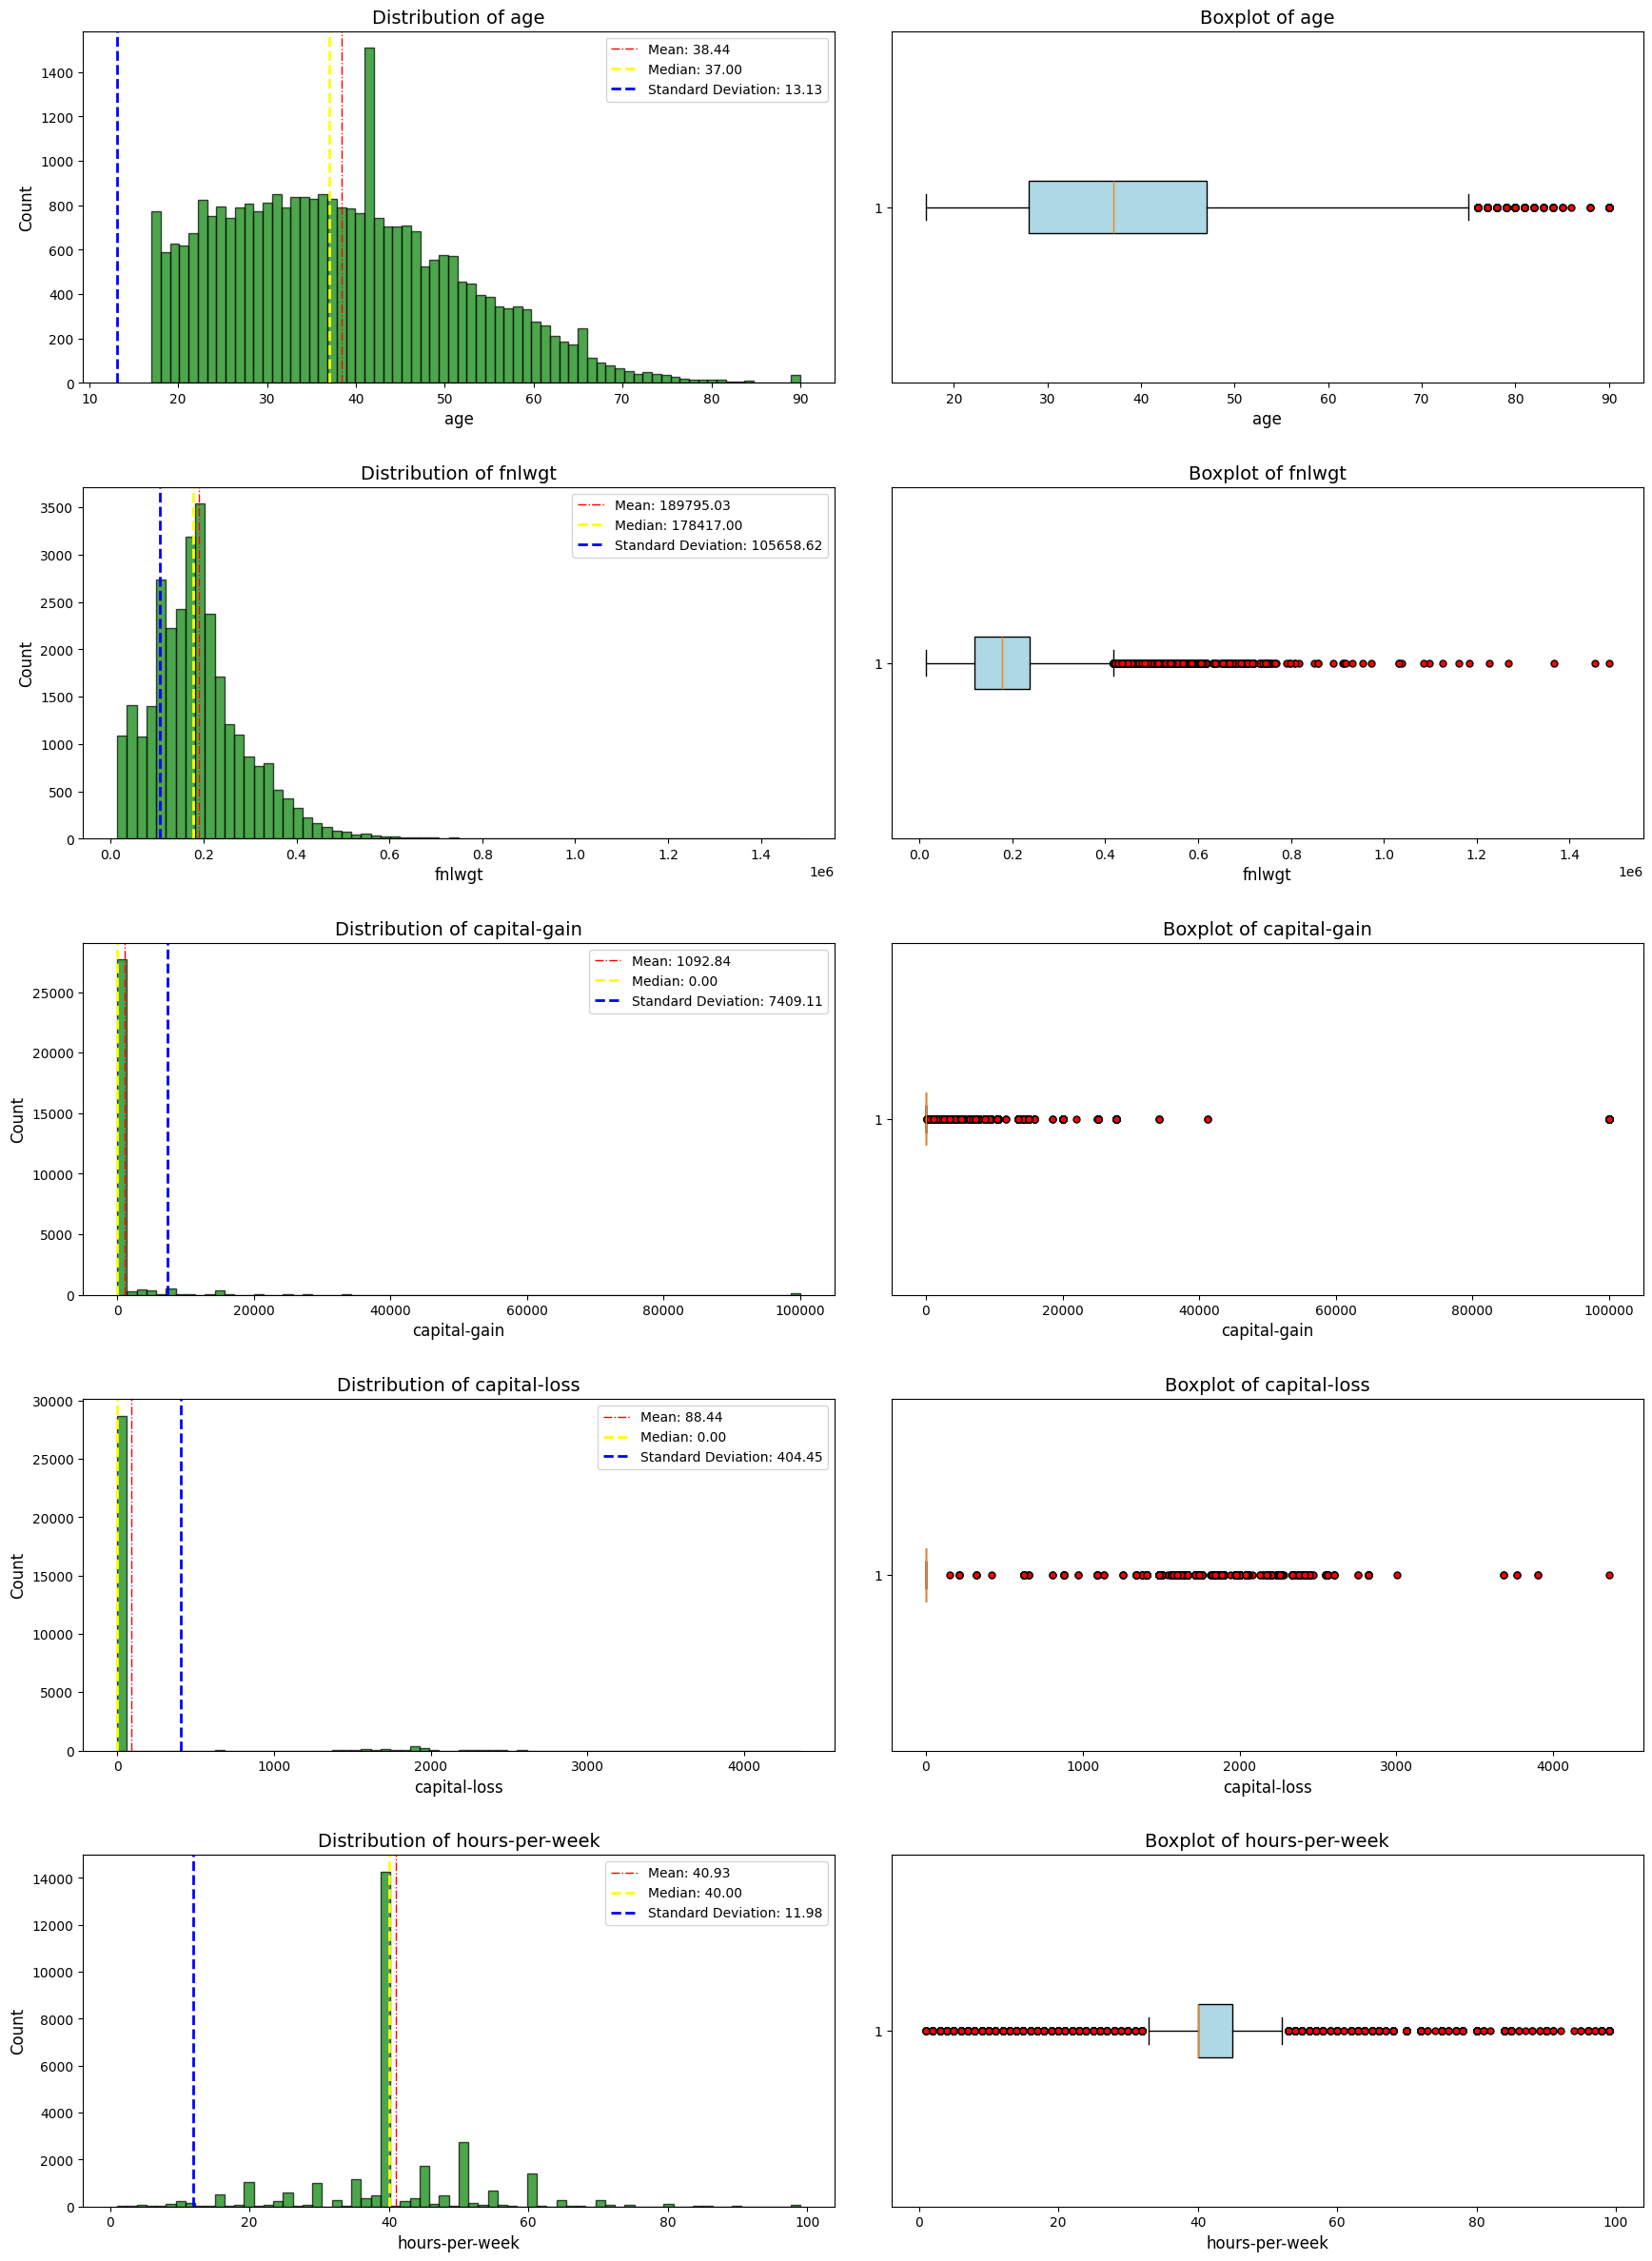

In [14]:
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(18, 5 * len(numerical_columns)))
color = 'green'

for i, feature in enumerate(numerical_columns):
    data = train[feature].dropna()  # Handle NaN values once
    mean = data.mean()
    median = data.median()
    std = data.std()
    
    # Histogram with Mean and Median Lines
    axes[i, 0].hist(data, color=color, bins=70, edgecolor='black', alpha=0.7)
    axes[i, 0].axvline(mean, linestyle='-.', color='red', linewidth=1, label=f'Mean: {mean:.2f}')
    axes[i, 0].axvline(median, linestyle='--', color='yellow', linewidth=2, label=f'Median: {median:.2f}')
    axes[i, 0].axvline(std, linestyle='--', color='blue', linewidth=2, label=f'Standard Deviation: {std:.2f}')
    axes[i, 0].legend(loc='upper right', fontsize=10)
    axes[i, 0].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i, 0].set_xlabel(feature, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)

    # Boxplot with Outlier Markers
    axes[i, 1].boxplot(data, vert=False, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', color='black'),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
    axes[i, 1].set_title(f'Boxplot of {feature}', fontsize=14)
    axes[i, 1].set_xlabel(feature, fontsize=12)

# Adjust layout and add spacing
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.95)  # Ensure no overlap with top title if added
plt.show()


In [15]:
# train[train['hours-per-week'] > 75][['hours-per-week', 'income']]
# train[train['capital-gain'] >= 60000][['capital-gain', 'income']]

In [16]:
# Identify the rows to drop based on the condition
index = train[(train['hours-per-week'] > 75) | (train['capital-gain'] >= 60000)].index

# Drop the identified rows
train = train.drop(index=index, axis=0)

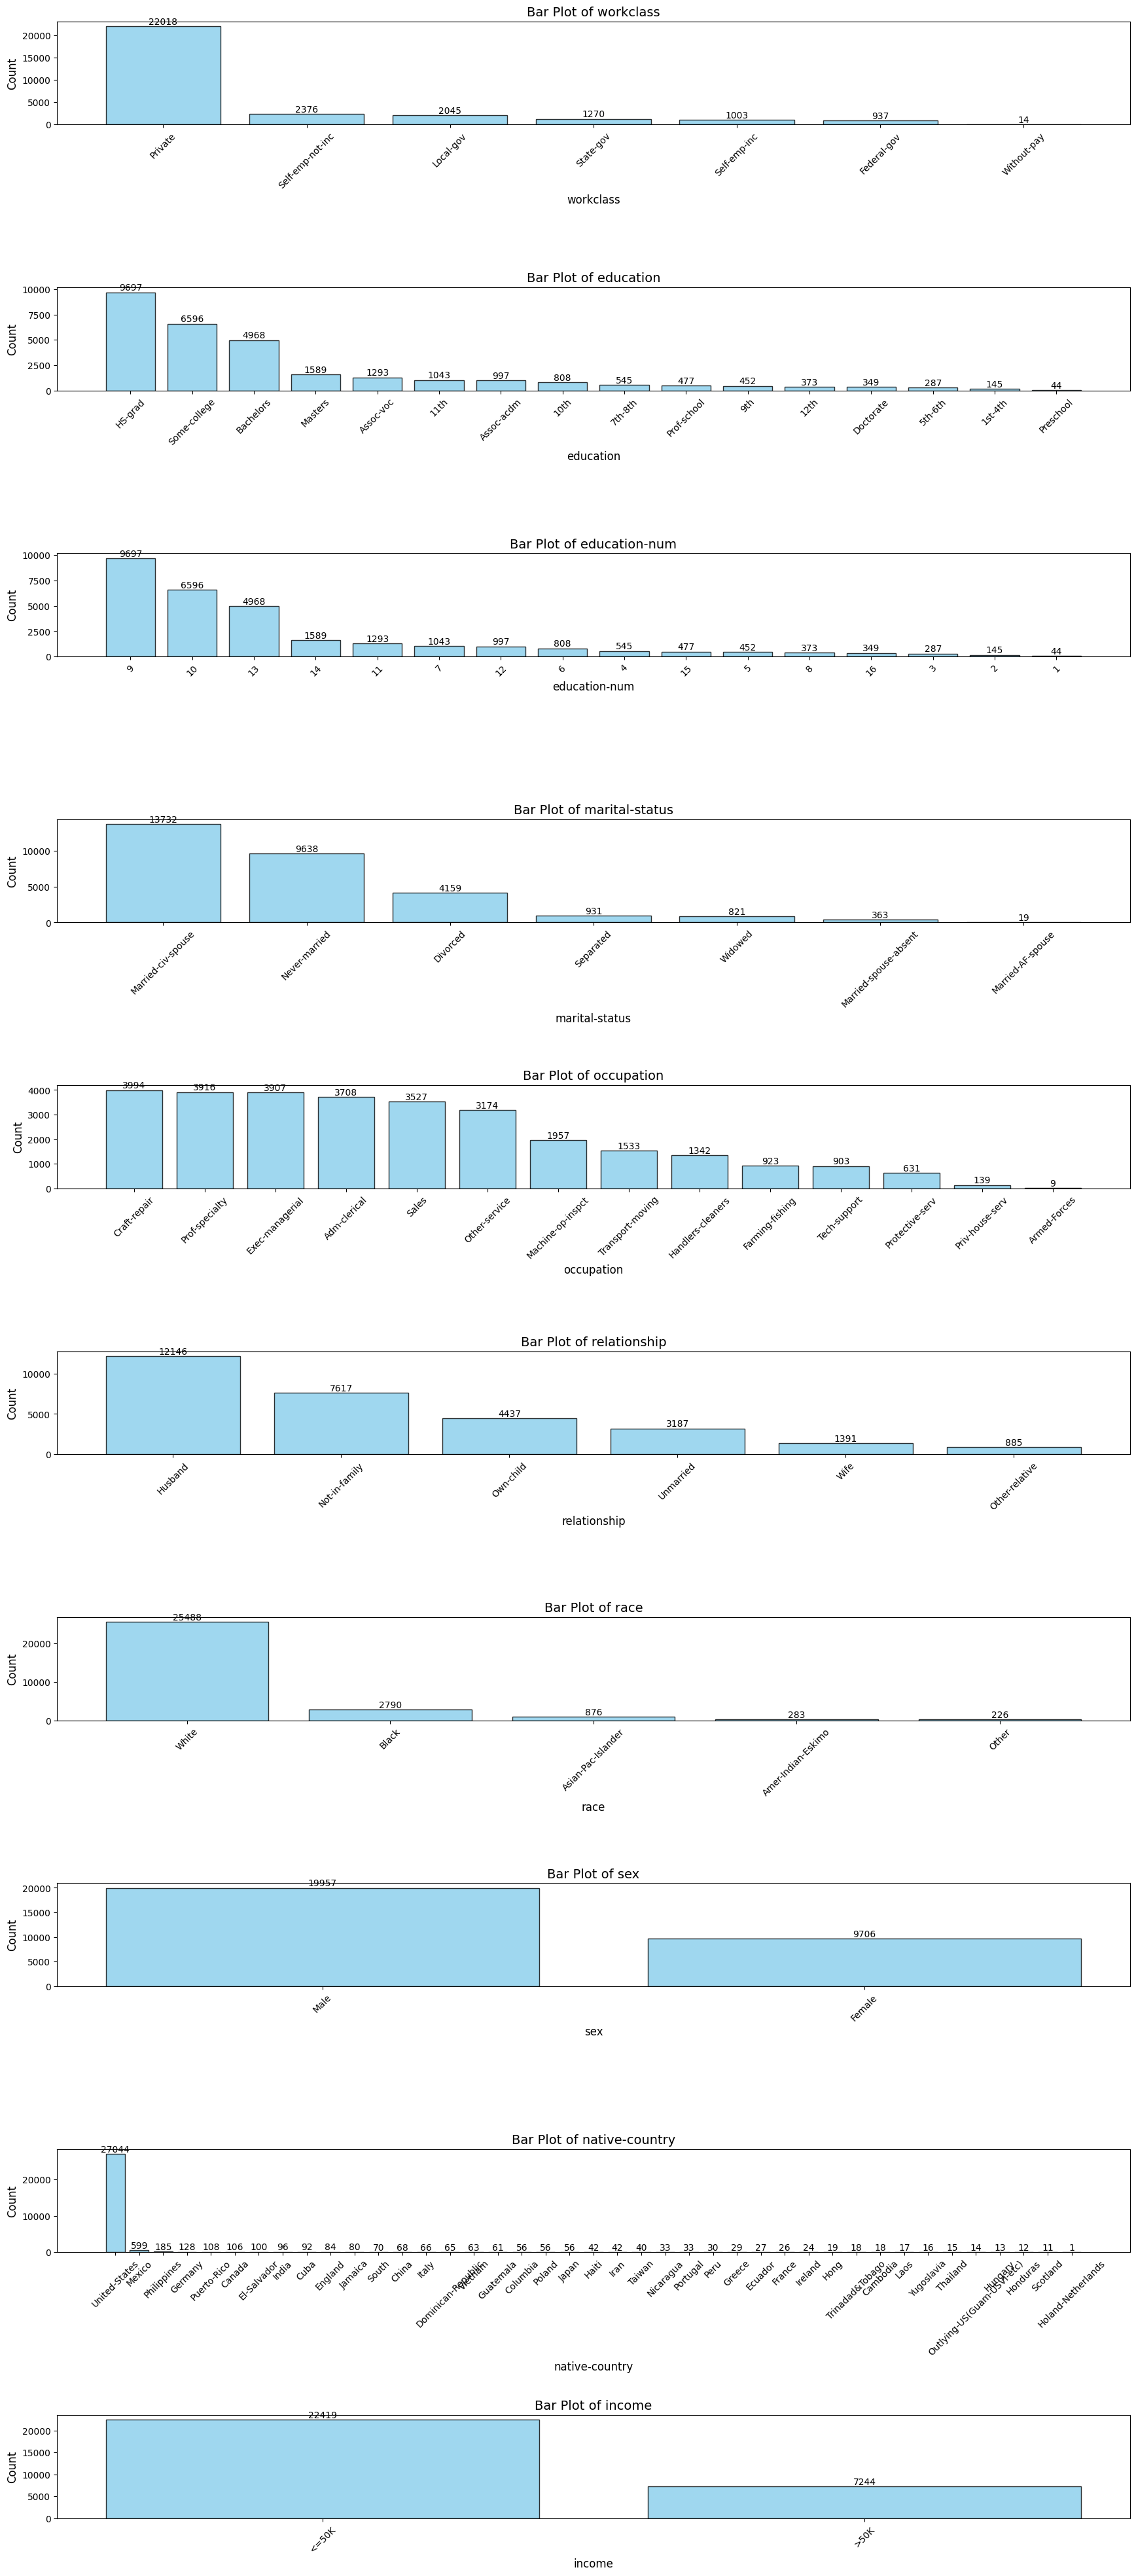

In [17]:
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(18, 4 * len(categorical_columns)))
for i, feature in enumerate(categorical_columns):
    data = train[feature].dropna()
    
    value_counts = data.value_counts(ascending=False)
    axes[i].bar(x=value_counts.index.astype(str), height=value_counts.values, color='skyblue', edgecolor='black', alpha=0.8)
    for j, value in enumerate(value_counts.values):
        axes[i].text(j, value + 0.5, f'{value}', ha='center', va='bottom', fontsize=10, color='black')

    axes[i].set_title(f'Bar Plot of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

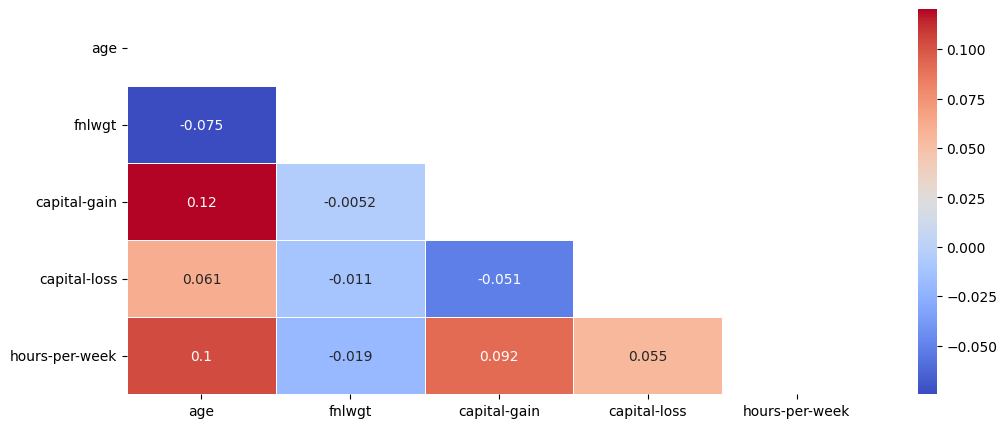

In [18]:
plt.figure(figsize=(12, 5))
corr = train[numerical_columns].corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, linewidths=0.5)
plt.show()

# Feature Engineering and preparation

### Dropping redundant features

In [19]:
# remove redundant feature
train = train.drop(['education'], axis=1)
train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Clustering countries
* We are clustering countries in native-countries to group countries, to reduce the dimensionality space before we perform one-hot encoding.
* First we create country_grouped table of averages of some features.
* Then we normalize those averages to be on a similar scale.
* Then we try to find best K value using The Elbow method.
* Then we perform the clustering with the best found K value.
* Finally, we map the clusters to the corresponding country and drop redundant features.

In [20]:
# Group data by native-country and aggregate relevant numerical features
country_grouped = train.groupby(by='native-country').agg({
    'age': 'mean',
    'fnlwgt': 'mean',
    'education-num': 'mean',
    'capital-gain': 'mean',
    'capital-loss': 'mean',
    'hours-per-week': 'mean',
    'income': lambda x: (x == '>50K').mean()  # Proportion of high-income individuals
}).reset_index()
country_grouped.head()

,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,Cambodia,38.888889,189291.722222,8.722222,1084.944444,104.222222,40.944444,0.388889
1,Canada,41.547170,182622.801887,10.632075,686.405660,148.320755,41.330189,0.330189
2,China,42.235294,178793.720588,11.235294,404.205882,198.000000,38.647059,0.294118
3,Columbia,39.339286,227963.910714,9.446429,190.285714,28.607143,39.642857,0.035714
4,Cuba,45.532609,248063.880435,9.695652,379.206522,72.326087,39.728261,0.271739


In [21]:
features_to_scale = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']

# Apply StandardScaler to normalize the features
scaler = StandardScaler()
country_grouped[features_to_scale] = scaler.fit_transform(country_grouped[features_to_scale])

country_grouped.head()

,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,Cambodia,0.109434,-0.162849,-0.639872,1.503399,-0.074754,0.306160,1.373911
1,Canada,0.779753,-0.308161,0.516762,0.562791,0.056756,0.471969,0.931709
2,China,0.953272,-0.391595,0.882079,-0.103239,0.204909,-0.681352,0.659977
3,Columbia,0.223007,0.679801,-0.201282,-0.608121,-0.300251,-0.253316,-1.286637
4,Cuba,1.784730,1.117770,-0.050349,-0.162241,-0.169874,-0.216606,0.491394


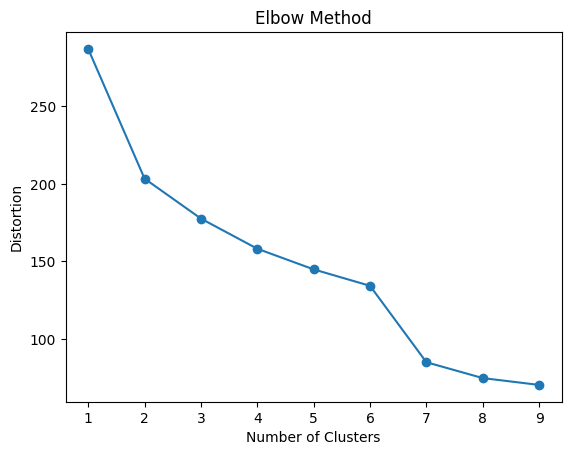

<Figure size 640x480 with 0 Axes>

In [22]:
# Find optimal number of clusters using the Elbow Method
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(country_grouped[features_to_scale])
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()
plt.tight_layout()

In [23]:
# Apply K-means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, random_state=42)
country_grouped['Cluster'] = kmeans.fit_predict(country_grouped[features_to_scale])

# Display the clusters
country_grouped[['native-country', 'Cluster']].head()

,native-country,Cluster
0,Cambodia,2
1,Canada,2
2,China,1
3,Columbia,0
4,Cuba,1


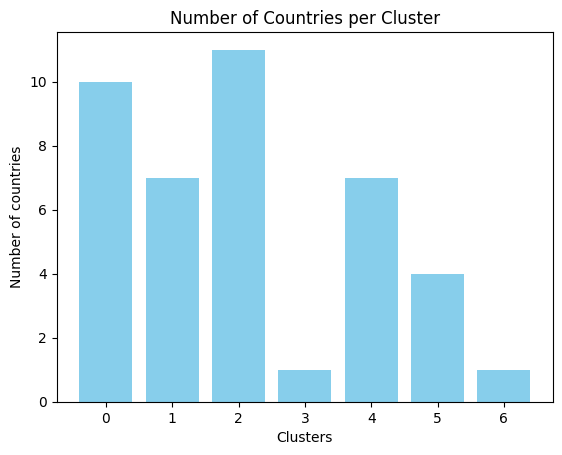

<Figure size 640x480 with 0 Axes>

In [24]:
plt.bar(x=country_grouped['Cluster'].value_counts().index, height=country_grouped['Cluster'].value_counts().values, color='skyblue')
plt.title('Number of Countries per Cluster')
plt.xlabel('Clusters')
plt.ylabel('Number of countries')
plt.show()
plt.tight_layout()

In [25]:
# Create a mapping from native-country to cluster
country_cluster_map = country_grouped.set_index('native-country')['Cluster'].to_dict()

# Add the cluster information to the original dataset
train['country-cluster'] = train['native-country'].map(country_cluster_map)

# Check the result
train[['native-country', 'country-cluster']].head()

,native-country,country-cluster
0,United-States,1
1,United-States,1
2,United-States,1
3,United-States,1
4,Cuba,1


In [26]:
train = train.drop(['native-country'], axis=1)
train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,country-cluster
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,1
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,1
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,1
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,1
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,1


### One-Hot Encoding

In [27]:
train = pd.get_dummies(train, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex'], drop_first=True)
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,country-cluster,workclass_Local-gov,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,2174,0,40,<=50K,1,False,False,...,True,False,False,False,False,False,False,False,True,True
1,50,83311,13,0,0,13,<=50K,1,False,False,...,False,False,False,False,False,False,False,False,True,True
2,38,215646,9,0,0,40,<=50K,1,False,True,...,True,False,False,False,False,False,False,False,True,True
3,53,234721,7,0,0,40,<=50K,1,False,True,...,False,False,False,False,False,False,True,False,False,True
4,28,338409,13,0,0,40,<=50K,1,False,True,...,False,False,False,False,True,False,True,False,False,False


### Transforming target to 0-1

In [28]:
train['income'] = train['income'].map({'>50K': 1,
                             '<=50K': 0})
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,country-cluster,workclass_Local-gov,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,77516,13,2174,0,40,0,1,False,False,...,True,False,False,False,False,False,False,False,True,True
1,50,83311,13,0,0,13,0,1,False,False,...,False,False,False,False,False,False,False,False,True,True
2,38,215646,9,0,0,40,0,1,False,True,...,True,False,False,False,False,False,False,False,True,True
3,53,234721,7,0,0,40,0,1,False,True,...,False,False,False,False,False,False,True,False,False,True
4,28,338409,13,0,0,40,0,1,False,True,...,False,False,False,False,True,False,True,False,False,False


### Feature Importance Analysis